# DECISION TREE>>>>Model Buildeing

In [95]:
import pandas as pd
import numpy as np

#visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn ML lib
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pickle
import json

import warnings
warnings.filterwarnings("ignore")

# problem Statement


In [ ]:
#breast cancer

# Data Gathering

In [3]:
breast_cancer = load_breast_cancer()

In [6]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
breast_cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df["target" ] = breast_cancer.target

In [10]:
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890       0  
1                  0.1860          0.2750                  0.08902       0  
2                  0.2430          0.3613                  0.08758       0  
3                  0.2575          0.6638                  0.17300       0  
4                  0.1625          0.2364                  0.076

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [12]:
df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [13]:
df.isna().sum()# we can clearly say that there is no missing values

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

# Feature Engineering

# Feature selection

In [30]:
df["target"].value_counts()

1    357
0    212
Name: target, dtype: int64

In [14]:
x = df.drop("target",axis = 1)
y = df["target"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=10 ,stratify=y)

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(455, 30)
(455,)
(114, 30)
(114,)


# Model_training

In [25]:
dt_clf_model = DecisionTreeClassifier(random_state=10)
dt_clf_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=10)

# ModelEvalution

In [29]:
y_pred_test = dt_clf_model.predict(x_test)

#confusion Matrics
cnf_metrics = confusion_matrix(y_test,y_pred_test)
print("Confusion Metrics\n",cnf_metrics)

#Accuracy
acc = accuracy_score(y_test,y_pred_test)
print("Accuracy",acc)

#classification Report 
clf_rep = classification_report(y_test,y_pred_test)
print("Classification Report\n",clf_rep)



Confusion Metrics
 [[40  2]
 [ 4 68]]
Accuracy 0.9473684210526315
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        42
           1       0.97      0.94      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



In [28]:
y_pred_train = dt_clf_model.predict(x_train)

#confusion Matrics
cnf_metrics = confusion_matrix(y_train,y_pred_train)
print("Confusion Metrics\n",cnf_metrics)

#Accuracy
acc = accuracy_score(y_train,y_pred_train)
print("Accuracy",acc)

#classification Report 
clf_rep = classification_report(y_train,y_pred_train)
print("Classification Report\n",clf_rep)

Confusion Metrics
 [[170   0]
 [  0 285]]
Accuracy 1.0
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       285

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



### Model Over Fitted on Training Data

In [34]:
array  = dt_clf_model.feature_importances_
array * 100

array([ 0.88041796,  4.23353918,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.19644059,  3.27771599,  0.        ,  0.        ,  0.86687307,
        0.        ,  0.77683937,  0.        ,  0.        ,  0.        ,
       73.83429031,  0.93532574,  0.        ,  1.22404234,  0.        ,
        0.        ,  1.97801881, 10.79649665,  0.        ,  0.        ])

In [40]:
sorting = array.sort()
sorted_feature_importance = pd.Series(array,index = x.columns )

<AxesSubplot:>

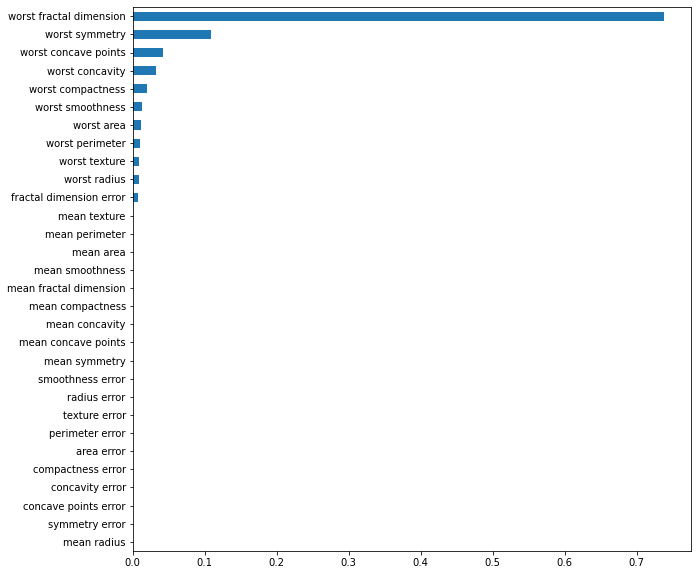

In [43]:
plt.figure(figsize = (10,10))
sorted_feature_importance.sort_values().plot(kind = 'barh')


In [50]:
# Tree without hyper parameter Tunning
plt.figure(figsize=(200,150))
plot_tree(dt_clf_model, feature_names=x.columns, class_names=['0','1'], filled=True)
print()
plt.savefig("Decision_tree_without_hyp.png")

# hyper parameter Tunning

In [54]:
#hyper parameter Tunning
dt_clf_model = DecisionTreeClassifier()
hyper_param_grid ={"criterion":["gini","entropy"],
    
     "max_depth": np.arange(3,10),
     "min_samples_split" : np.arange(2,20),
     "min_samples_leaf" : np.arange(2,20)}
rscv_dt_clf = GridSearchCV(dt_clf_model,hyper_param_grid,cv =5)
rscv_dt_clf.fit(x_train,y_train)
rscv_dt_clf.best_estimator_


DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=4)

In [57]:
clf_dt = rscv_dt_clf.best_estimator_
clf_dt.fit(x_train, y_train)



DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=4)

In [58]:
#ACCuracy on Testing Da
y_pred_test = clf_dt.predict(x_test)

#confusion Matrics
cnf_metrics = confusion_matrix(y_test,y_pred_test)
print("Confusion Metrics\n",cnf_metrics)

#Accuracy
acc = accuracy_score(y_test,y_pred_test)
print("Accuracy",acc)

#classification Report 
clf_rep = classification_report(y_test,y_pred_test)
print("Classification Report\n",clf_rep)


Confusion Metrics
 [[36  6]
 [ 5 67]]
Accuracy 0.9035087719298246
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.86      0.87        42
           1       0.92      0.93      0.92        72

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



In [60]:
#accurecy in Testing Data
y_pred_train = clf_dt.predict(x_train)

#confusion Matrics
cnf_metrics = confusion_matrix(y_train,y_pred_train)
print("Confusion Metrics\n",cnf_metrics)

#Accuracy
acc = accuracy_score(y_train,y_pred_train)
print("Accuracy",acc)

#classification Report 
clf_rep = classification_report(y_train,y_pred_train)
print("Classification Report\n",clf_rep)

Confusion Metrics
 [[158  12]
 [  7 278]]
Accuracy 0.9582417582417583
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       170
           1       0.96      0.98      0.97       285

    accuracy                           0.96       455
   macro avg       0.96      0.95      0.96       455
weighted avg       0.96      0.96      0.96       455



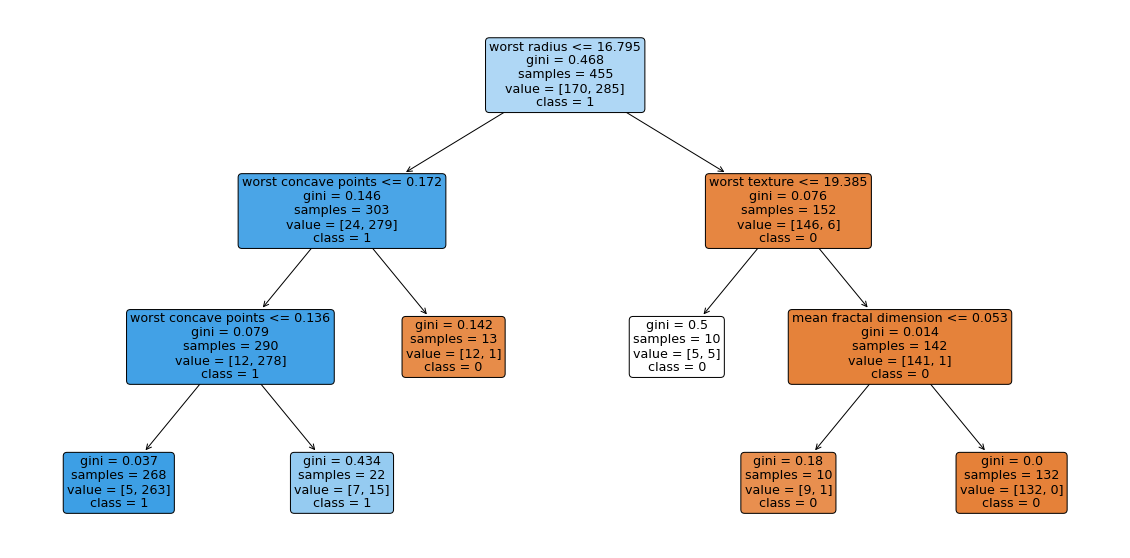

In [62]:
plt.figure(figsize= (20,10))
plot_tree(clf_dt,feature_names=x.columns, class_names=['0','1'], filled=True, rounded = True)
plt.savefig("DT_Hyperpara_Tunning.png")

In [63]:
decision_tree_model = DecisionTreeClassifier(random_state=10)
decision_tree_model.fit(x_train, y_train)
result = decision_tree_model.cost_complexity_pruning_path(x_train, y_train)# this fuction will return the dictionary of "ccpa-alpha" and the "impurities"
ccp_alpha_list = result['ccp_alphas']
ccp_alpha_list

array([0.        , 0.00218894, 0.00288655, 0.0029304 , 0.0029304 ,
       0.00405748, 0.00482655, 0.00560005, 0.00646065, 0.01061984,
       0.01241126, 0.04251642, 0.34558835])

In [78]:
result

{'ccp_alphas': array([0.        , 0.00218894, 0.00288655, 0.0029304 , 0.0029304 ,
        0.00405748, 0.00482655, 0.00560005, 0.00646065, 0.01061984,
        0.01241126, 0.04251642, 0.34558835]),
 'impurities': array([0.        , 0.00437788, 0.01303753, 0.01596793, 0.01889833,
        0.02295582, 0.02778236, 0.03338241, 0.04630372, 0.0675434 ,
        0.07995465, 0.12247107, 0.46805941])}

In [67]:
train_accuracy_list = []
test_accuracy_list = []

for i in ccp_alpha_list:
    decision_tree_model = DecisionTreeClassifier(ccp_alpha= i,random_state=10)
    decision_tree_model.fit(x_train, y_train)
    
    training_accuracy = decision_tree_model.score(x_train, y_train)
    train_accuracy_list.append(training_accuracy)
    
    testing_Accuracy = decision_tree_model.score(x_test, y_test)
    test_accuracy_list.append(testing_Accuracy)
    
test_accuracy_list

[0.9473684210526315,
 0.956140350877193,
 0.9649122807017544,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9385964912280702,
 0.956140350877193,
 0.9473684210526315,
 0.9122807017543859,
 0.9035087719298246,
 0.8771929824561403,
 0.631578947368421]

In [68]:
train_accuracy_list

[1.0,
 0.9978021978021978,
 0.9934065934065934,
 0.989010989010989,
 0.989010989010989,
 0.9868131868131869,
 0.9846153846153847,
 0.9824175824175824,
 0.9758241758241758,
 0.9648351648351648,
 0.9582417582417583,
 0.9340659340659341,
 0.6263736263736264]

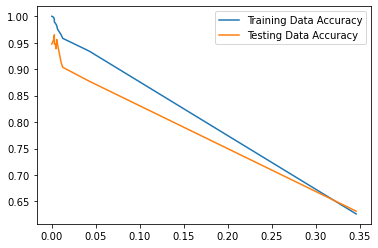

In [69]:
fig, ax = plt.subplots()
ax.plot(ccp_alpha_list, train_accuracy_list, label = "Training Data Accuracy")
ax.plot(ccp_alpha_list, test_accuracy_list, label = "Testing Data Accuracy")
ax.legend()

In [70]:
index_ccp = test_accuracy_list.index(max(test_accuracy_list))#0.96
index_ccp

2

In [72]:
best_ccp = ccp_alpha_list[index_ccp]#from array we can calculated
best_ccp

0.0028865494416316

In [75]:
decision_tree_model = DecisionTreeClassifier(ccp_alpha=best_ccp,random_state=10)
decision_tree_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0028865494416316, random_state=10)

In [76]:
# testing data evaluation
y_pred_test = decision_tree_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix :\n", cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy Score :", accuracy)
print("*"*80)

clf_report = classification_report(y_test, y_pred_test)
print("Classification report :\n", clf_report)

Confusion Matrix :
 [[40  2]
 [ 2 70]]
********************************************************************************
Accuracy Score : 0.9649122807017544
********************************************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        42
           1       0.97      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [77]:
plt.figure(figsize=(200,150))
plot_tree(decision_tree_model, feature_names=x.columns, class_names=['0','1'], filled=True, rounded = True)
print()
plt.savefig("Decision_tree_with_prunning.png")

In [81]:
x.head(1).T

0
mean radius                17.990000
mean texture               10.380000
mean perimeter            122.800000
mean area                1001.000000
mean smoothness             0.118400
mean compactness            0.277600
mean concavity              0.300100
mean concave points         0.147100
mean symmetry               0.241900
mean fractal dimension      0.078710
radius error                1.095000
texture error               0.905300
perimeter error             8.589000
area error                153.400000
smoothness error            0.006399
compactness error           0.049040
concavity error             0.053730
concave points error        0.015870
symmetry error              0.030030
fractal dimension error     0.006193
worst radius               25.380000
worst texture              17.330000
worst perimeter           184.600000
worst area               2019.000000
worst smoothness            0.162200
worst compactness           0.665600
worst concavity             0.711900
worst concave points        0.265400
worst symmetry              0.460100
worst fractal dimension     0.118900

In [82]:
columns = x.columns
columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [ ]:
#TEstiong on single user....

In [93]:
mean_radius = 17.990000
mean_texture = 10.380000
mean_perimeter = 122.800000
mean_area = 1001.000000
mean_smoothness = 0.118400
mean_compactness = 0.277600
mean_concavity = 0.300100
mean_concave_points = 0.147100
mean_symmetry = 0.241900
mean_fractal_dimension = 0.078710
radius_error = 1.095000
texture_error = 0.905300
perimeter_error = 8.589000
area_error = 153.400000
smoothness_error = 0.006399
compactness_error = 0.049040
concavity_error = 0.053730
concave_points_error = 0.015870
symmetry_error = 0.030030
fractal_dimension_error = 0.006193
worst_radius = 25.380000
worst_texture = 17.330000
worst_perimeter = 184.600000
worst_area = 2019.000000
worst_smoothness = 0.162200
worst_compactness =0.665600
worst_concavity	= 0.711900
worst_concave_points = 0.265400
worst_symmetry = 0.460100
worst_fractal_dimension = 0.118900
len(columns)

30

In [96]:
array = np.zeros(len(columns))

array[0] = mean_radius
array[1] = mean_texture
array[2] = mean_perimeter
array[3] = mean_area
array[4] = mean_smoothness
array[5] = mean_compactness
array[6] = mean_concavity
array[7] = mean_concave_points
array[8] = mean_symmetry
array[9] = mean_fractal_dimension
array[10] = radius_error
array[11] = texture_error
array[12] = perimeter_error
array[13] = area_error
array[14] = smoothness_error
array[15] = compactness_error
array[16] = concavity_error
array[17] = concave_points_error
array[18] = symmetry_error
array[19] = fractal_dimension_error
array[20] = worst_radius
array[21] = worst_texture
array[22] = worst_perimeter
array[23] = worst_area
array[24] = worst_smoothness
array[25] = worst_compactness
array[26] = worst_concavity
array[27] = worst_concave_points
array[28] = worst_symmetry
array[29] = worst_fractal_dimension
array

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [99]:
dictionary = {"columns" : list(columns) }

In [97]:
with open("dt.pkl","wb") as f:
    pickle.dump(dt_clf_model,f)

In [98]:
with open("prundecisiontree.pkl","wb") as f:
    pickle.dump(decision_tree_model,f)

In [100]:
with open("columns.json","w") as f:
    json.dump(dictionary,f)